In [1]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from itertools import combinations, permutations
from molvs import standardize_smiles

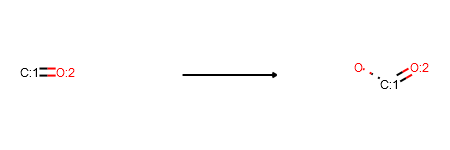

In [5]:
Ketone_to_CarboxylicAcid = "[Ch:1](=[O:2]) >> [C:1](=[O:2])O"
rxn = AllChem.ReactionFromSmarts(Ketone_to_CarboxylicAcid)
rxn

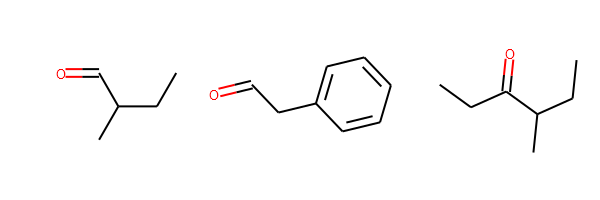

In [3]:
s1 = "O=CC(CC)C"
s2 = "O=CCc1ccccc1"
s3 = "C(=O)(C(CC)C)CC"

mol_s1 = Chem.MolFromSmiles(s1)
mol_s2 = Chem.MolFromSmiles(s2)
mol_s3 = Chem.MolFromSmiles(s3)

mol_list = [mol_s1, mol_s2, mol_s3]

Chem.Draw.MolsToGridImage(mol_list)

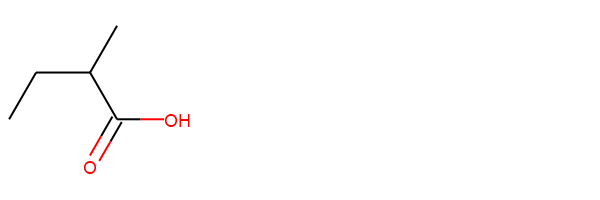

In [4]:
resulting_mols = []
products = rxn.RunReactants((mol_s1,))
for i in range(len(products)):
    current_mol = products[i][0]
    resulting_mols.append(current_mol)

Chem.Draw.MolsToGridImage(resulting_mols) 

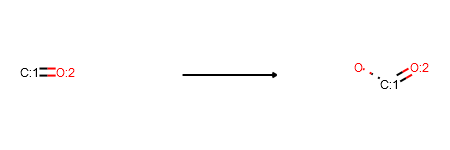

In [5]:
smarts = "[C:1](=[O:2])O.[N:3] >> [C:1](=[O:2])[N:3]"
amine_coupling_rxn = AllChem.ReactionFromSmarts(smarts)
rxn

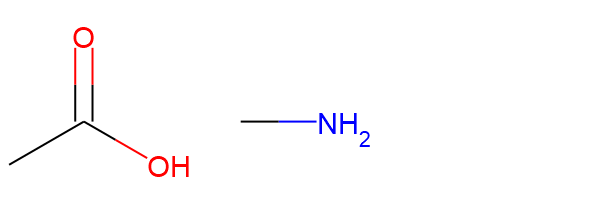

In [6]:
carboxylic_acid = "C(=O)(O)C"
amine           = "NC"

carboxylic_acid_mol = Chem.MolFromSmiles(carboxylic_acid)
amine_mol           = Chem.MolFromSmiles(amine)

Chem.Draw.MolsToGridImage([carboxylic_acid_mol, amine_mol])

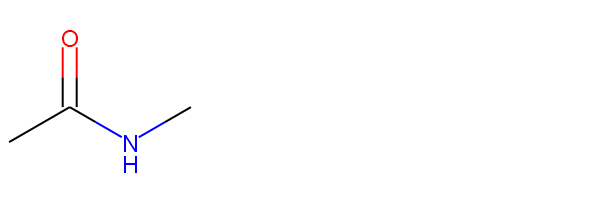

In [7]:
products = amine_coupling_rxn.RunReactants ([carboxylic_acid_mol, amine_mol])
resulting_mol_list = []
for i in range(len(products)):
    resulting_mol_list.append(products[i][0])

Chem.Draw.MolsToGridImage(resulting_mol_list) 

In [8]:
def amide_coupling(smile1, smile2):
    mol1 = Chem.MolFromSmiles(smile1)
    mol2 = Chem.MolFromSmiles(smile2)
    smarts = "[C:1](=[O:2])O.[Nh:3] >> [C:1](=[O:2])[Nh:3]"
    rxn3 = AllChem.ReactionFromSmarts (smarts)
    products = rxn3.RunReactants ([mol1, mol2])
    resulting_smile_list = []
    try:
        for i in range(len(products)):
            resulting_smile = Chem.MolToSmiles(products[i][0])
            resulting_smile_list.append(resulting_smile)
    except:
        pass
    return resulting_smile_list


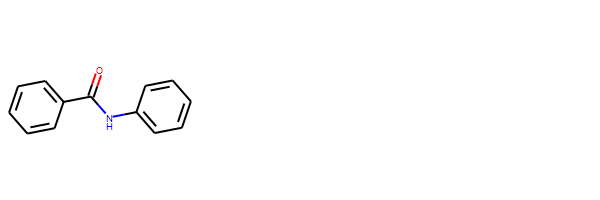

In [9]:
cpd1 = "C(=O)(c1ccccc1)O"
cpd2 = "c1(ccccc1)N"
resulting_smiles = amide_coupling(cpd1, cpd2)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(j) for j in resulting_smiles]) 

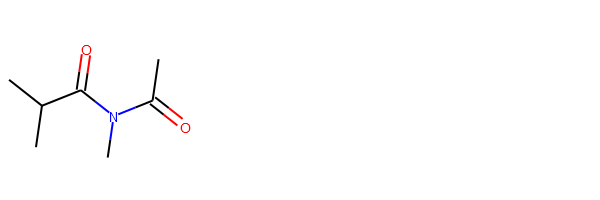

In [10]:
cpd1 = "C(=O)(C(C)C)O"
cpd2 = "C(=O)(NC)C"
resulting_smiles = amide_coupling(cpd1, cpd2)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(j) for j in resulting_smiles]) 